In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [55]:
import pandas as pd
import os
import re
import codecs
from IPython.display import display, Math, Latex
from IPython.display import Image as ipImage
from six.moves import cPickle as pickle
import string
from PIL import Image
import numpy as np
import h5py
import viz_commons as viz
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 600
pd.options.display.expand_frame_repr = False
pd.options.display.colheader_justify = 'left'

In [4]:
import data_commons as dtc
import dl_commons as dlc
import viz_commons as vc
from viz_commons import VisualizeDir, DiffParams, VisualizeStep

### Notebook Arguments
----------------------

In [29]:
# storedir = '/zpool_3TB/i2l/tb_metrics/2017-12-21 02-20-10 PST 140K_score_89.0/test_runs/step_00168100_score89.0_publish/store_2'
storedir = '/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2'
clobber = False
dump = False

original_image_dir = '/zpool_3TB/i2l/data/dataset5/formula_images'
rel_dumpdir = 'eval_images'
dumpdir = os.path.join(storedir, rel_dumpdir)
rendered_dir = os.path.join(storedir, rel_dumpdir, 'rendered_images')

____________________________________

In [6]:
vd = VisualizeDir(os.path.expanduser(storedir))
last_step = vd.view_steps()[1][-1]
print('last_step = %d' % last_step)

Loaded /zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/hyper.pkl and /zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/args.pkl
Loaded ../data/dataset5/training_56/df_train.pkl (114408, 3)
Loaded ../data/dataset5/training_56/df_test.pkl (14280, 3)
Loaded ../data/dataset5/training_56/df_valid.pkl (14280, 3)
num eval_steps = 1
eval_steps = [(167526, 146585)]
all_steps = []
last_step = 167526


In [7]:
vs = VisualizeStep(vd, 'test', last_step)
df, df_result, df_data, sr_label = vs.get_preds(rel_dumpdir=rel_dumpdir, dump=dump, clobber=clobber)
# df = vs.dump_preds(rel_dumpdir=rel_dumpdir, dump=dump)

In [8]:
df

,image_name,iloc,ed,target_len,target_seq,pred_len,pred_seq
eval_image_name,,,,,,,
8eb596be1210429.png,8eb596be1210429_basic.png,0,0.000000,24,h ^ { a } ( \phi ) = \omega ^ { a b } \partial _ { b } H ( \phi ),24,h ^ { a } ( \phi ) = \omega ^ { a b } \partial _ { b } H ( \phi )
425391c19cc90e6.png,425391c19cc90e6_basic.png,1,0.000000,85,d s _ { 4 } ^ { 2 } = - f ( R ) \left( 1 - \frac { 2 m } { R } \right) d t ^ { 2 } + f ^ { - 1 } ( R ) \left[ \left( 1 - \frac { 2 m } { R } \right) ^ { - 1 } d R ^ { 2 } + R ^ { 2 } d \Omega _ { 2 } ^ { 2 } \right],85,d s _ { 4 } ^ { 2 } = - f ( R ) \left( 1 - \frac { 2 m } { R } \right) d t ^ { 2 } + f ^ { - 1 } ( R ) \left[ \left( 1 - \frac { 2 m } { R } \right) ^ { - 1 } d R ^ { 2 } + R ^ { 2 } d \Omega _ { 2 } ^ { 2 } \right]
7a939f28e0fd64a.png,7a939f28e0fd64a_basic.png,2,0.000000,58,"\left( \mu \frac { \partial } { \partial \mu } + \beta ^ { ( \alpha ) } \frac { \partial } { \partial \alpha } - \gamma _ { m } \, m \frac { \partial } { \partial m } \right) \, { \cal L } ( \alpha , m ; \mu ) = 0 .",58,"\left( \mu \frac { \partial } { \partial \mu } + \beta ^ { ( \alpha ) } \frac { \partial } { \partial \alpha } - \gamma _ { m } \, m \frac { \partial } { \partial m } \right) \, { \cal L } ( \alpha , m ; \mu ) = 0 ."
a03ca65ad0186d6.png,a03ca65ad0186d6_basic.png,3,0.000000,29,W = 2 w \operatorname { c o s } \delta _ { 0 } \operatorname { e x p } ( i \delta _ { 0 } ),29,W = 2 w \operatorname { c o s } \delta _ { 0 } \operatorname { e x p } ( i \delta _ { 0 } )
e4b4876c34c094d.png,e4b4876c34c094d_basic.png,4,0.000000,31,Q \equiv M _ { + } - M _ { - } = \frac { 1 } { 2 \pi } \int d x \partial _ { x } \phi,31,Q \equiv M _ { + } - M _ { - } = \frac { 1 } { 2 \pi } \int d x \partial _ { x } \phi
72b26b7d712937b.png,72b26b7d712937b_basic.png,5,0.000000,59,\frac { q _ { 1 } ^ { 2 } } { \sigma _ { 3 } ^ { 2 } } + \frac { q _ { 2 } ^ { 2 } } { \sigma _ { 3 } ^ { 2 } - \sigma _ { 2 } ^ { 2 } } = 1,59,\frac { q _ { 1 } ^ { 2 } } { \sigma _ { 3 } ^ { 2 } } + \frac { q _ { 2 } ^ { 2 } } { \sigma _ { 3 } ^ { 2 } - \sigma _ { 2 } ^ { 2 } } = 1
0a7747e7015c151.png,0a7747e7015c151_basic.png,6,0.000000,29,\xi _ { R o b i n } ( \kappa ) = \xi _ { d a m p e d } ( \kappa / k ) .,29,\xi _ { R o b i n } ( \kappa ) = \xi _ { d a m p e d } ( \kappa / k ) .
43afdc9657030d0.png,43afdc9657030d0_basic.png,7,0.000000,32,\epsilon _ { a b c } \phi _ { b } ^ { m } \partial _ { c } ^ { m } \Gamma _ { i } = 0,32,\epsilon _ { a b c } \phi _ { b } ^ { m } \partial _ { c } ^ { m } \Gamma _ { i } = 0
385cc082a49793d.png,385cc082a49793d_basic.png,8,0.000000,86,M _ { \eta ^ { \prime } } ^ { 2 } = \frac { 2 N _ { f } } { N _ { c } - N _ { f } } \left( \frac { 1 2 } { 1 1 } \right) ^ { 2 } \Lambda ^ { 2 } D \left( N _ { c } \right) ^ { \frac { 1 } { N _ { c } - N _ { f } } } \ .,86,M _ { \eta ^ { \prime } } ^ { 2 } = \frac { 2 N _ { f } } { N _ { c } - N _ { f } } \left( \frac { 1 2 } { 1 1 } \right) ^ { 2 } \Lambda ^ { 2 } D \left( N _ { c } \right) ^ { \frac { 1 } { N _ { c } - N _ { f } } } \ .


In [9]:
df_result

,target_seq,pred_seq,score_pred,score_gold
eval_image_name,,,,
8eb596be1210429.png,h ^ { a } ( \phi ) = \omega ^ { a b } \partial _ { b } H ( \phi ),h ^ { a } ( \phi ) = \omega ^ { a b } \partial _ { b } H ( \phi ),0,0
425391c19cc90e6.png,d s _ { 4 } ^ { 2 } = - f ( R ) \left( 1 - \frac { 2 m } { R } \right) d t ^ { 2 } + f ^ { - 1 } ( R ) \left[ \left( 1 - \frac { 2 m } { R } \right) ^ { - 1 } d R ^ { 2 } + R ^ { 2 } d \Omega _ { 2 } ^ { 2 } \right],d s _ { 4 } ^ { 2 } = - f ( R ) \left( 1 - \frac { 2 m } { R } \right) d t ^ { 2 } + f ^ { - 1 } ( R ) \left[ \left( 1 - \frac { 2 m } { R } \right) ^ { - 1 } d R ^ { 2 } + R ^ { 2 } d \Omega _ { 2 } ^ { 2 } \right],0,0
7a939f28e0fd64a.png,"\left( \mu \frac { \partial } { \partial \mu } + \beta ^ { ( \alpha ) } \frac { \partial } { \partial \alpha } - \gamma _ { m } \, m \frac { \partial } { \partial m } \right) \, { \cal L } ( \alpha , m ; \mu ) = 0 .","\left( \mu \frac { \partial } { \partial \mu } + \beta ^ { ( \alpha ) } \frac { \partial } { \partial \alpha } - \gamma _ { m } \, m \frac { \partial } { \partial m } \right) \, { \cal L } ( \alpha , m ; \mu ) = 0 .",0,0
a03ca65ad0186d6.png,W = 2 w \operatorname { c o s } \delta _ { 0 } \operatorname { e x p } ( i \delta _ { 0 } ),W = 2 w \operatorname { c o s } \delta _ { 0 } \operatorname { e x p } ( i \delta _ { 0 } ),0,0
e4b4876c34c094d.png,Q \equiv M _ { + } - M _ { - } = \frac { 1 } { 2 \pi } \int d x \partial _ { x } \phi,Q \equiv M _ { + } - M _ { - } = \frac { 1 } { 2 \pi } \int d x \partial _ { x } \phi,0,0
72b26b7d712937b.png,\frac { q _ { 1 } ^ { 2 } } { \sigma _ { 3 } ^ { 2 } } + \frac { q _ { 2 } ^ { 2 } } { \sigma _ { 3 } ^ { 2 } - \sigma _ { 2 } ^ { 2 } } = 1,\frac { q _ { 1 } ^ { 2 } } { \sigma _ { 3 } ^ { 2 } } + \frac { q _ { 2 } ^ { 2 } } { \sigma _ { 3 } ^ { 2 } - \sigma _ { 2 } ^ { 2 } } = 1,0,0
0a7747e7015c151.png,\xi _ { R o b i n } ( \kappa ) = \xi _ { d a m p e d } ( \kappa / k ) .,\xi _ { R o b i n } ( \kappa ) = \xi _ { d a m p e d } ( \kappa / k ) .,0,0
43afdc9657030d0.png,\epsilon _ { a b c } \phi _ { b } ^ { m } \partial _ { c } ^ { m } \Gamma _ { i } = 0,\epsilon _ { a b c } \phi _ { b } ^ { m } \partial _ { c } ^ { m } \Gamma _ { i } = 0,0,0
385cc082a49793d.png,M _ { \eta ^ { \prime } } ^ { 2 } = \frac { 2 N _ { f } } { N _ { c } - N _ { f } } \left( \frac { 1 2 } { 1 1 } \right) ^ { 2 } \Lambda ^ { 2 } D \left( N _ { c } \right) ^ { \frac { 1 } { N _ { c } - N _ { f } } } \ .,M _ { \eta ^ { \prime } } ^ { 2 } = \frac { 2 N _ { f } } { N _ { c } - N _ { f } } \left( \frac { 1 2 } { 1 1 } \right) ^ { 2 } \Lambda ^ { 2 } D \left( N _ { c } \right) ^ { \frac { 1 } { N _ { c } - N _ { f } } } \ .,0,0


In [10]:
df_data

,iloc
eval_image_name,
8eb596be1210429.png,0
425391c19cc90e6.png,1
7a939f28e0fd64a.png,2
a03ca65ad0186d6.png,3
e4b4876c34c094d.png,4
72b26b7d712937b.png,5
0a7747e7015c151.png,6
43afdc9657030d0.png,7
385cc082a49793d.png,8


In [11]:
sr_label

eval_image_name
8eb596be1210429.png                                                                                                                                                                                                                                                                                                       h ^ { a } ( \phi ) = \omega ^ { a b } \partial _ { b } H ( \phi ) 
425391c19cc90e6.png                                                                                                                                                 d s _ { 4 } ^ { 2 } = - f ( R ) \left( 1 - \frac { 2 m } { R } \right) d t ^ { 2 } + f ^ { - 1 } ( R ) \left[ \left( 1 - \frac { 2 m } { R } \right) ^ { - 1 } d R ^ { 2 } + R ^ { 2 } d \Omega _ { 2 } ^ { 2 } \right] 
7a939f28e0fd64a.png                                                                                                                                                 \left( \mu \frac { \partial } { \partial \mu } + \beta ^ {

### Render Images
Render images using render_latex.py (https://github.com/untrix/im2latex/blob/master/thirdparty/harvardnlp_im2markup/scripts/evaluation/render_latex.py) which is derived from harvardnlp code base (https://github.com/harvardnlp/im2markup). See their github page for details on how to run the script.

In [12]:
# for image in df.image_name:
#     os.symlink(os.path.join(original_image_dir, image), os.path.join(golden_image_dir, image))

### Evaluate images
Evaluate image match using evaluate_image.py (https://github.com/untrix/im2latex/blob/master/thirdparty/harvardnlp_im2markup/scripts/evaluation/evaluate_image.py) also from harvard nlp code base. See their github page for details on how to run the script. However, make sure to use the code from this repository because it has been modified to produce an unmatched_files.txt output.

### View and save the unmatched images

In [78]:
with open(os.path.join(rendered_dir, 'unmatched_filenames.txt'), 'r') as f:
    files = []
    for fname in f:
        files.append(os.path.basename(fname.strip()))
    
df_bad = df.loc[files]
targets=[]; preds=[]; index=[]
for row in df_bad[['target_seq', 'pred_seq']].sample(55).itertuples(index=True):
    index.append(row[0])
    targets.append('$%s$'%row[1])
    preds.append('$%s$'%row[2])
df_ = pd.DataFrame(data={'gold': targets, 'pred': preds})
df_

,gold,pred
0,$\dot { \epsilon } _ { \delta \sigma } = \epsilon _ { \delta \sigma } \left[ 3 { \frac { \dot { a } } { a } } ( 1 + w ) + 2 { \frac { \dot { c } } { c } } { \frac { 1 + \epsilon _ { \delta \sigma } } { 1 + \epsilon } } + \left( { \frac { \dot { G } _ { 4 } } { G _ { 4 } } } - 4 { \frac { \dot { c } } { c } } \right) ( 1 + \epsilon _ { \delta \sigma } ) \right] . $,$\dot { \epsilon } _ { \delta \sigma } = \epsilon _ { \delta \sigma } \left[ 3 \frac { \dot { a } } { a } ( 1 + w ) + 2 \frac { \dot { c } } { c } \frac { 1 + \epsilon _ { \delta \sigma } } { 1 + \epsilon } + \left( \frac { G _ { 4 } } { G _ { 4 } } - 4 \frac { \dot { c } } { c } \right) ( 1 + \epsilon _ { \delta \sigma } ) \right] . $
1,"$R ^ { - } \equiv \frac { \sigma _ { N C } ^ { \nu N _ { 0 } } - \sigma _ { N C } ^ { \bar { \nu } N _ { 0 } } } { \sigma _ { C C } ^ { \nu N _ { 0 } } - \sigma _ { C C } ^ { \bar { \nu } N _ { 0 } } } = \frac { 1 } { 2 } - \mathrm { s i n } ^ { 2 } ( \theta _ { W } ) \, . $","$R ^ { - } \equiv { \frac { \sigma _ { N } ^ { \theta N _ { 0 } } - \sigma _ { N 0 } ^ { \bar { \nu } N } } { \sigma _ { C C } ^ { e N } - \sigma _ { C C } ^ { \bar { D } 0 } } } = { \frac { 1 } { 2 } } - \operatorname { s i n } ^ { 2 } ( \theta _ { W } ) \, . $"
2,"$\eta _ { 0 i j k } = \rho _ { i j k } \quad \mathrm { a n d ~ z e r o ~ e l s e w h e r e } , $","$\eta _ { 0 i j k } = \rho _ { i j k } \quad \mathrm { a n d } \ \mathrm { z e r o \ e l s e n b e r e } , $"
3,"$\big < \operatorname { e x p } \int _ { \cal M } \Phi _ { 0 } { \cal O } \big > _ { C F T } = \operatorname { e x p } \left( - S _ { A d S } ( \Phi ) \right) , $","$\left\langle \operatorname { e x p } \int _ { \cal M } \Phi _ { 0 } { \cal O } \right> _ { C F T } = \operatorname { e x p } \left( - S _ { A d S } ( \Phi ) \right) , $"
4,"$S _ { \mathrm { e f f } } ^ { \mathrm { r e g } } [ A , m = 0 ] = S _ { \mathrm { e f f } } [ A , m = 0 ] - \operatorname* { l i m } _ { M \to \infty } S _ { \mathrm { e f f } } [ A , M ] $","$S _ { \mathrm { e f f } } ^ { \mathrm { e r f } } [ A , m = 0 ] = S _ { \mathrm { e f f } } [ A , m = 0 ] - \operatorname* { l i m } _ { M \to \infty } S _ { \mathrm { e f f } } [ A , M ] $"
5,$\frac { d \mathbf { p } } { d s } = \frac { D p ^ { a } } { d s } \mathbf { e } _ { a } = ( \nabla _ { b } p ^ { a } ) u ^ { b } \mathbf { e } _ { a } $,$\frac { d { \bf p } } { d s } = \frac { D p ^ { 2 } } { d s } { \bf e } _ { a } = ( { \bf \nabla } _ { b } p ^ { a } ) u ^ { b } { \bf e } _ { a } $
6,$\Gamma ( a _ { 1 } \to \rho \pi ) = \frac { 1 } { 9 6 \pi } \frac { g _ { a _ { 1 } \rho \pi } ^ { 2 } } { m _ { a _ { 1 } } } \left[ 1 - \frac { m _ { \rho } ^ { 2 } } { m _ { a _ { 1 } } } \right] \left[ 1 0 + \frac { m _ { a _ { 1 } } ^ { 2 } } { m _ { \rho } ^ { 2 } } + \frac { m _ { \rho } ^ { 2 } } { m _ { a _ { 1 } } ^ { 2 } } \ \right] $,$\Gamma ( a _ { 1 } \to \rho \pi ) = { \frac { 1 } { 9 6 \pi } } { \frac { g _ { a _ { 1 } m \pi } ^ { 2 } } { m _ { a _ { 1 } } } } \left[ 1 - { \frac { m _ { \rho } ^ { 2 } } { m _ { a _ { 1 } } } } \right] \left[ 1 0 + { \frac { m _ { a _ { 1 } } ^ { 2 } } { m _ { \rho } ^ { 2 } } } + { \frac { m _ { \rho } ^ { 2 } } { m _ { a _ { 1 } } ^ { 2 } } } \right] $
7,"${ H ^ { l f } \equiv P ^ { - } } = \int d x \, \Bigl [ \omega ( \lambda \omega ^ { 2 } - m ^ { 2 } ) \varphi + { \frac { 1 } { 2 } } ( 3 \lambda \omega ^ { 2 } - m ^ { 2 } ) \varphi ^ { 2 } + \lambda \omega \varphi ^ { 3 } + { \frac { \lambda } { 4 } } \varphi ^ { 4 } \Bigr ] . $",$H ^ { l f } \equiv P ^ { - } = \int d x \left[ \omega ( \lambda \omega ^ { 2 } - m ^ { 2 } ) \varphi + \frac { 1 } { 2 } ( 3 \lambda \omega ^ { 2 } - m ^ { 2 } ) \varphi ^ { 2 } + \lambda \omega \varphi ^ { 3 } + \frac { \lambda } { 4 } \varphi ^ { 4 } \right] . $
8,$\frac { 1 } { ( 2 \pi l ) ^ { 2 } } \int _ { S _ { \infty } ^ { 3 } } e _ { a } { \mathrm { \tiny ~ \wedge ~ } } d e ^ { a } = 3 . $,${ \frac { 1 } { ( 2 \pi l ) ^ { 2 } } } \int _ { S _ { \infty } ^ { 3 } } e _ { a } { \L

### In favor of compatibility with publishing tools, remove entries that are not rendered by MathJax 
Though they rendered fine with render_latex.py above, MathJax has difficulty rendering them. Therefore we will remove them for visualization purposes just in case it causes a problem with publishing tools downstream.

In [82]:
df_2_ = df_.drop([51, 41, 18, 21, 35, 38, 26]).reindex()[:50]

In [110]:
pd.options.display.latex.repr = True
with open('/tmp/df_2_frag.tex', 'w') as f:
    f.write(df_2_.to_latex(escape=False))

In [97]:
pd.options.display.latex.repr = True

(df_2_.iloc[0])

gold    $\dot { \epsilon } _ { \delta \sigma } = \epsilon _ { \delta \sigma } \left[ 3 { \frac { \dot { a } } { a } } ( 1 + w ) + 2 { \frac { \dot { c } } { c } } { \frac { 1 + \epsilon _ { \delta \sigma } } { 1 + \epsilon } } + \left( { \frac { \dot { G } _ { 4 } } { G _ { 4 } } } - 4 { \frac { \dot { c } } { c } } \right) ( 1 + \epsilon _ { \delta \sigma } ) \right] . $
pred    $\dot { \epsilon } _ { \delta \sigma } = \epsilon _ { \delta \sigma } \left[ 3 \frac { \dot { a } } { a } ( 1 + w ) + 2 \frac { \dot { c } } { c } \frac { 1 + \epsilon _ { \delta \sigma } } { 1 + \epsilon } + \left( \frac { G _ { 4 } } { G _ { 4 } } - 4 \frac { \dot { c } } { c } \right) ( 1 + \epsilon _ { \delta \sigma } ) \right] . $                             
Name: 0, dtype: object

In [51]:
num2display = 10
# with open(os.path.join(rendered_dir, 'unmatched_filenames.txt'), 'r') as f:
#     files = np.random.choice(f.readlines(), num2display)
#     for fname in files:
#         fname = os.path.basename(fname.strip())
#         display(df.loc[fname][['target_seq', 'pred_seq']])
#         gold = ipImage(filename=os.path.join(rendered_dir, 'images_gold', fname), unconfined=True)
#         pred = ipImage(filename=os.path.join(rendered_dir, 'images_pred', fname), unconfined=True)
#         display(gold)
#         display(pred)
gold = []; pred = [];
gold_images = []; pred_images = []
with open(os.path.join(rendered_dir, 'unmatched_filenames.txt'), 'r') as f:
    files = np.random.choice(f.readlines(), num2display)
    for fname in files:
        fname = os.path.basename(fname.strip())
        if not os.path.exists(os.path.join(rendered_dir, 'images_pred', fname)):
            continue
        gold_images.append(ipImage(filename=os.path.join(rendered_dir, 'images_gold', fname), format='png', unconfined=True))
        gold.append('<img src=".%s"/>' % os.path.join(rendered_dir, 'images_gold', fname))
        pred_images.append(ipImage(filename=os.path.join(rendered_dir, 'images_pred', fname), format='png', unconfined=True))
        pred.append('<img src=".%s"/>' % os.path.join(rendered_dir, 'images_pred', fname))
df_= pd.DataFrame({'gold': gold, 'pred': pred})
HTML((df_).to_html(escape=False))

,gold,pred
0,,
1,,
2,,
3,,
4,,
5,,
6,,
7,,
8,,
9,,


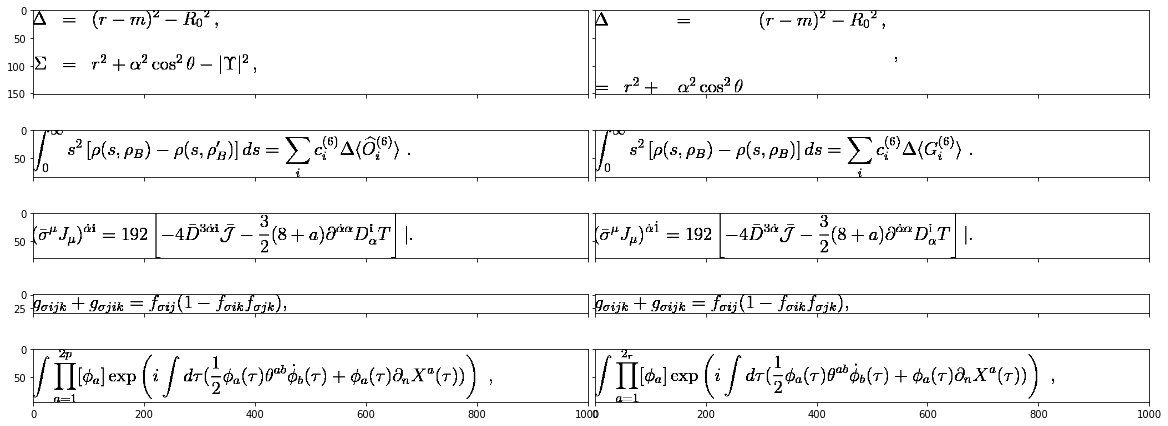

In [71]:
def loadImage(path, mode="RGB"):
    img = Image.open(path)
    img = img.convert(mode)
    return np.asarray(img)

def plotImage(path, axes):
    image_data = loadImage(path)
#     title = os.path.splitext(os.path.basename(path))[0] + ' %s'%(image_data.shape,)
#     axes.set_title( title )
    axes.set_xlim(0,1000)
    axes.imshow(image_data, aspect='equal', extent=None, resample=False, interpolation='bilinear')
    return

def plotImages(image_paths, dpi=None):
    """ image_details should be an array of image path and width - [[path, image_data, image_data.shape], ...] """
    ## Display image data loaded as a numpy array
    try:
        plt.close(fig)
    except:
        pass
    orig_dpi = plt.rcParams['figure.dpi']

    for path in (image_paths):
        gold = os.path.join(rendered_dir, 'images_gold', path)
        pred = os.path.join(rendered_dir, 'images_pred', path)
        image_data.append(plotImage(gold, grid[i]))
        i+=1
        image_data.append(plotImage(pred, grid[i]))
        i+=1
        
    with mpl.rc_context(rc={'figure.dpi': dpi or orig_dpi}):
        fig = plt.figure(figsize=(20.,2.*len(image_paths)))
        grid = ImageGrid(fig, 111, nrows_ncols=(len(image_paths),2), axes_pad=(0.1, 0.5), label_mode="L")
        i = 0
        for path in (image_paths):
            gold = os.path.join(rendered_dir, 'images_gold', path)
            pred = os.path.join(rendered_dir, 'images_pred', path)
            plotImage(gold, grid[i])
            i+=1
            plotImage(pred, grid[i])
            i+=1
    return # image_data

num2display = 5
with open(os.path.join(rendered_dir, 'unmatched_filenames.txt'), 'r') as f:
    files = [os.path.basename(fname.strip()) for fname in np.random.choice(f.readlines(), num2display)]
fnames=[]
plotImages(files)

# fig, axes = plt.subplots(nrows=num2display, ncols=2, sharex=True, sharey=True, squeeze=True)
# for i, fname in enumerate(files):
#     fname = os.path.basename(fname.strip())
#     im_gold = loadImage(os.path.join(rendered_dir, 'images_gold', fname))
#     im_pred = loadImage(os.path.join(rendered_dir, 'images_pred', fname))
#     axes[i][0].imshow(im_gold, aspect='equal', extent=None, resample=False, interpolation='bilinear', cmap='gray')
#     axes[i][1].imshow(im_pred, aspect='equal', extent=None, resample=False, interpolation='bilinear', cmap='gray')

In [49]:
# for fname in files:
#     print os.path.join(rendered_dir,'images_gold', os.path.basename(fname.strip()))
#     print os.path.join(rendered_dir,'images_pred', os.path.basename(fname.strip()))

/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/eval_images/rendered_images/images_gold/f7fce9895d99aac.png
/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/eval_images/rendered_images/images_pred/f7fce9895d99aac.png
/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/eval_images/rendered_images/images_gold/21a71f54d6f8f29.png
/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/eval_images/rendered_images/images_pred/21a71f54d6f8f29.png
/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score89.09/test_runs/step_00167526_score89.0_publish/store_2/eval_images/rendered_images/images_gold/b396bfc79014cec.png
/zpool_3TB/i2l/tb_metrics/2017-12-25 21-04-15 PST 140K_noRegroup_score

### Evaluate Exact Match of Images

In [16]:
# total_num, matched_num, unmatched, missing = viz.compare_images(os.path.join(rendered_dir, 'images_gold'), os.path.join(rendered_dir, 'images_pred'))